### Capsule Image Recognition

Using cv2 color hist for image quantification and Isolation Forest for modeling.

In [2]:
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import cv2
%matplotlib inline

In [4]:
! pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=931728499cff4172a4a5ef2a02965e8e9b53628e1ecf1b3611bd3889ae43bf09
  Stored in directory: c:\users\hawau toyin\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [3]:
from imutils import paths
import cv2
def quantify_image(image, bins=(4, 6, 3)):
    # compute a 3D color histogram over the image and normalize it
    hist = cv2.calcHist([image], [0, 1, 2], None, bins,
        [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    # return the histogram
    return hist

In [4]:
def load_dataset(datasetPath, bins):
    # grab the paths to all images in our dataset directory, then
    # initialize our lists of images
    imagePaths = list(paths.list_images(datasetPath))
    data = []
    # loop over the image paths
    for imagePath in imagePaths:
        # load the image and convert it to the HSV color space
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        # quantify the image and update the data list
        features = quantify_image(image, bins)
        data.append(features)
    # return our data list as a NumPy array
    return np.array(data)

In [5]:
# import the necessary packages
# from pyimagesearch.features import load_dataset
from sklearn.ensemble import IsolationForest
import argparse
import pickle
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-d", "--dataset", required=True,
#     help="path to dataset of images")
# ap.add_argument("-m", "--model", required=True,
#     help="path to output anomaly detection model")
# args = vars(ap.parse_args())

In [6]:
# load and quantify our image dataset
print("[INFO] preparing dataset...")
data = load_dataset('C:\\Users\\Hawau Toyin\\Downloads/capsule/train/good', bins=(3, 3, 3))
# train the anomaly detection model
print("[INFO] fitting anomaly detection model...")
model = IsolationForest(n_estimators=100, contamination=0.01,
    random_state=42)
model.fit(data)

[INFO] preparing dataset...
[INFO] fitting anomaly detection model...


IsolationForest(contamination=0.01, random_state=42)

In [10]:

# load the input image, convert it to the HSV color space, and
# quantify the image in the *same manner* as we did during training
image = cv2.imread('C:\\Users\\Hawau Toyin\Downloads/bottle/test/good/001.png')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
features = quantify_image(hsv, bins=(3, 3, 3))

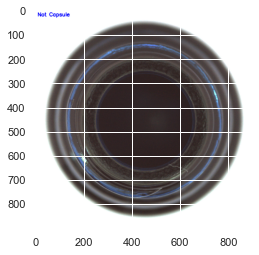

In [11]:
# use the anomaly detector model and extracted features to determine
# if the example image is an anomaly or not
preds = model.predict([features])[0]
label = "Not Capsule" if preds == -1 else "capsule"
color = (0, 0, 255) if preds == -1 else (0, 255, 0)
# draw the predicted label text on the original image
cv2.putText(image, label, (10,  25), cv2.FONT_HERSHEY_SIMPLEX,
    0.7, color, 2)
# display the image
# cv2.imshow("Output", image)
# cv2.waitKey(0)
plt.imshow(image)